# Analysis Jupyter Notebook
### Controlla il path della cartella

### Data Handling

In [69]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
import matplotlib.colors

%pwd
#%cd /media/data/emanuele/TTR/smog-to-gromos/old/fix-concentration_gradient/make_fibrillone-2000-296K-1mM-bis/analysis

### Data import

matrix = pd.read_csv('histo-time.dat', sep = '\\s+', header = None)


### Data handling
#### Defining the Maxclust and the number of frames
clustsize = list(range(0, len(matrix.columns), 1))
frames = list(range(0, len(matrix.index), 1))
fibril = list(range(2, len(matrix.columns)))
#not_fibril = list(range(3, 10, 1))


#### Multiply the columns for its clustsize
ser = pd.Series(clustsize)
matrix = matrix.mul(ser, axis = 1)

#### Replace 0 with n.an
matrix[matrix == 0] = np.nan

#### I don't care about monomers
matrix = matrix.drop([0, 1], axis = 1)

### Make the histogram to compare with lab results
#histogram = matrix[[2, 3, 4, 5, 6, 7, 8, 9, 10]].copy()
#histogram.set_index(2)
histogram = matrix[fibril].sum(axis=1)

# Matrix transpose
matrix = matrix.T




#print(matrix)
#print(maxclust) # seems ok
#print(frames) # seems ok

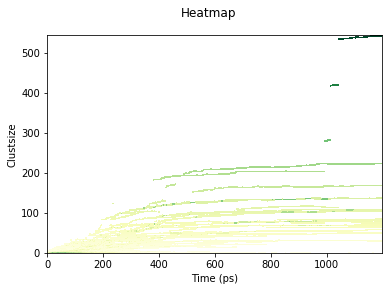

In [80]:
plt.pcolormesh(matrix, cmap = 'YlGn', rasterized = True)
plt.ylabel('Clustsize')
plt.xlabel('Time (ps)')
plt.xlim(0, 1200)
plt.suptitle('Heatmap')
plt.show()


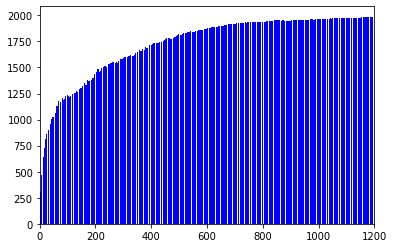

In [84]:
plt.bar(frames, histogram, color = 'blue')
plt.xlim(0, 1200)
plt.show()